In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

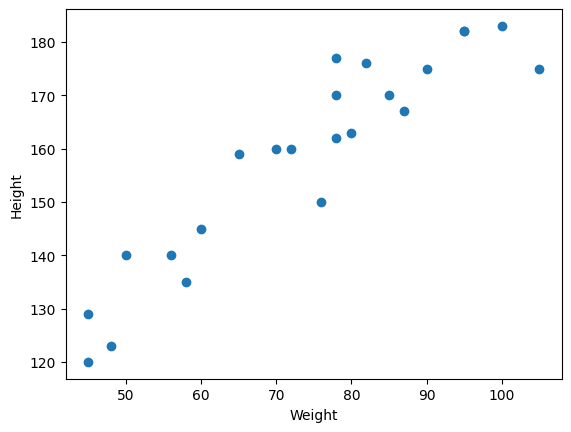

In [30]:
## Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [31]:
## Correlaton
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


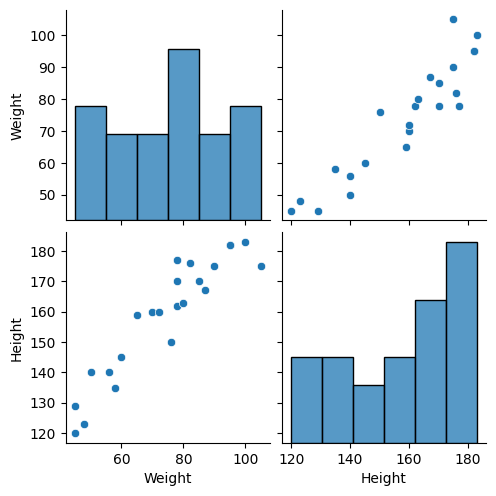

In [32]:
### Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [33]:
## Independent and dependent feature
X = df[['Weight']] # Independent feature should be in dataframe or 2d array
np.array(X).shape 


(23, 1)

In [34]:
X = df['Weight'] # Now x is 1-d
np.array(X).shape

(23,)

In [35]:
## Independent and dependent feature
X = df[['Weight']] # Independent feature should be in dataframe or 2d array
Y = df['Height'] # dependent feature should be in series or 1-d array

In [36]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=12) # 25% used for testing & remain for training
# train_test_split() --> function is correctly splitting your dataset into training and testing sets.


In [37]:
X_train.shape

(17, 1)

In [38]:
## Standardization (Using z-score --> mean=0, std=1)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler() ## Initializing

In [39]:
X_train = scaler.fit_transform(X_train) # Computes mean,std & transforms data
X_test = scaler.transform(X_test) # Uses the same mean & std from training data

### --- Imp for Interview Qs ----###
# If using fit_transform() in test data, you recalculate mean and std. 
# This leads to data leakage, which can severely impact model performance.

In [40]:
X_test

array([[ 1.05962773],
       [-1.79465119],
       [ 1.69391193],
       [-1.47750909],
       [ 1.37676983],
       [-0.08208384]])

In [41]:
### Apply simple Linear Regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1) # n_jobs = -1 --> use all available CPU cores

In [42]:
regression.fit(X_train,y_train) # training a Linear Regression model using the training data (X_train, y_train)

LinearRegression(n_jobs=-1)

In [43]:
print("Cofficient or slope: ",regression.coef_ )
print("Intercept: ",regression.intercept_ )


Cofficient or slope:  [16.5605241]
Intercept:  157.2941176470588


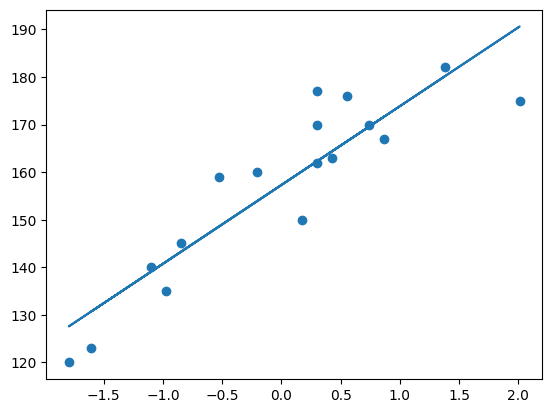

In [44]:
## Ploting tarining data, plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [45]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [46]:
## Performance Matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [47]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  13.198558408123565
MAE:  2.8459364646267864
RMSE:  3.6329820269475


### R square Formula

**R^2** = **1 - `SSR`/`SST`**

R^2 = **coefficient of determination SSR** = **sum of squares of residuals SST** = **total sum of squares**

In [49]:
from sklearn.metrics import r2_score

In [50]:
score = r2_score(y_test,y_pred)
print(score)

0.9693709725589861


**Adjusted R^2 = 1 – [(1-R^2)*(n-1)/(n-k-1)]**

where:

`R^2`: The R^2 of the model

`n`: The number of observations

`k`: The number of predictor variables

In [59]:
# Dispaly Adjusted R-squared
1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


0.9617137156987325

In [64]:
### OLS Linear Regression

import statsmodels.api as sm

In [67]:
model = sm.OLS(y_train,X_train).fit()

In [68]:
prediction = model.predict(X_test)
print(prediction)

[ 17.54799055 -29.72036427  28.0520694  -24.46832485  22.80002997
  -1.35935138]


In [69]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.1769
Date:                Tue, 18 Feb 2025   Prob (F-statistic):                       0.680
Time:                        23:53:16   Log-Likelihood:                         -110.13
No. Observations:                  17   AIC:                                      222.3
Df Residuals:                      16   BIC:                                      223.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Dinesh-Gupta\ML\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
### Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Dinesh-Gupta\ML\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.93476627])